In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=np.loadtxt('data.txt',delimiter=',',dtype='float')
df=pd.DataFrame(data,columns=['feature1','feature2','positive or negative'])
df['positive or negative']=df['positive or negative'].replace([0,1],['negative','positive'])
df.head(11)

,feature1,feature2,positive or negative
0,0.051267,0.699560,positive
1,-0.092742,0.684940,positive
2,-0.213710,0.692250,positive
3,-0.375000,0.502190,positive
4,-0.513250,0.465640,positive
5,-0.524770,0.209800,positive
6,-0.398040,0.034357,positive
7,-0.305880,-0.192250,positive
8,0.016705,-0.404240,positive
9,0.131910,-0.513890,positive


In [3]:
x_train=data[:,:2];y_train=data[:,2]


In [4]:
positive=np.where(y_train==1);negative=np.where(y_train!=1)

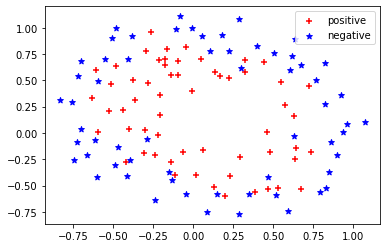

In [5]:
plt.scatter(x_train[positive,0],x_train[positive,1],marker='+',color='r',label='positive')
plt.scatter(x_train[negative,0],x_train[negative,1],marker='*',color='b',label='negative')
plt.legend(loc='upper right')

In [6]:
print(x_train.shape);print(y_train.shape)

(118, 2)
(118,)


In [7]:
#generating polynomial features with desire degree of algebraic expression 
def map_feature(x1,x2,degree):
    feature=[]
    count=0
    for i in range (1,degree+1):
        for j in range(i+1):
            feature.append((x1**(i-j))*(x2**j))
            count=count+1
    feature=np.array(feature);feature=(feature.reshape(count,-1)).T
    return feature,count


In [8]:
x_mapped, count=map_feature(x_train[:,0],x_train[:,1],6)

In [9]:
def sigmoid(x):
    #x:ndarray (m,n) dimensional
    sigmoid=1/(1+np.exp(-x))
    return sigmoid

In [10]:
def feature_scaling(x):
    #x: input feature with shape (m,n)
    mu=np.mean(x,axis=0,keepdims=True)
    std=np.std(x,axis=0,keepdims=True)
    x_scaled=(x-mu)/std
    return mu,std,x_scaled

In [11]:
mu,sigma,x_mapped_scaled=feature_scaling(x_mapped)

In [12]:
#Cost function with regularization
def cost_function(x,y,w,b,landa):
    #x input features ndarray(m,n) m:number of training examples n:number of features
    #y target values, array(m,)
    #w:model parameter, array(n,)
    #b:model parameter, Scalar
    #landa: regularization parameter
    m=x.shape[0]
    cost=(1/m)*(-np.dot(y,np.log(sigmoid(np.matmul(x,w)+b)))-np.dot((1-y),np.log(1-sigmoid(np.matmul(x,w)+b))))
    cost=cost+(landa/(2*m))*np.sum(np.square(w))
    return cost
    

In [13]:
#gradiend descent with regularization
def update_w_b(x,y,w_initial,b_initial,alpha,num_iter,landa):
    #x input features, ndarray(m,n) m:number of training examples n:number of features
    #y target values, array(m,)
    #w:model parameter, array(n,)
    #b:model parameter, Scalar
    #landa: regularization parameter
    m,n=x.shape
    w=w_initial;b=b_initial;
    cost_history=[];
    for i in range(num_iter):
        dj_dw=(1/m)*np.matmul(np.transpose(sigmoid(np.matmul(x,w)+b)-y),x)+(landa/m)*w
        dj_db=np.mean(sigmoid(np.matmul(x,w)+b)-y)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=cost_function(x,y,w,b,landa)
        cost_history.append(cost)
    return w,b,cost_history    

In [14]:
m,n=x_mapped_scaled.shape
w_initial=np.zeros(n);b_initial=0;alpha=0.5;num_iter=300;landa=5
w,b,cost_history=update_w_b(x_mapped_scaled,y_train,w_initial,b_initial,alpha,num_iter,landa)

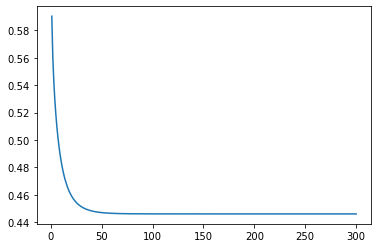

In [15]:
plt.plot(np.linspace(1,num_iter,num_iter),cost_history)

In [16]:
print(f'final w and b are w:{w}, b:{b} and final cost is:{cost_history[num_iter-1]}')

final w and b are w:[ 0.39857987  0.70497895 -0.48642721 -0.4492844  -0.49773346  0.20832793
  0.14302398 -0.01065539  0.12532087 -0.53426854 -0.06954622 -0.24350348
 -0.1909036  -0.50547839 -0.04815865 -0.03174284  0.22316052 -0.12867148
 -0.21243289 -0.12622592 -0.47801313  0.02970331 -0.25444134  0.09497696
 -0.34396656 -0.13501133 -0.4004872 ], b:-0.27903346163588905 and final cost is:0.4461105946849737


In [17]:
def predict(x,w,b):
    y_predict=(sigmoid(np.matmul(x,w)+b)>=0.5).astype('int')
    return y_predict

In [18]:
y_predict=predict(x_mapped_scaled,w,b)

In [19]:
#plot decision boundary
min_1=min(x_train[:,0]);max_1=max(x_train[:,0])
min_2=min(x_train[:,1]);max_2=max(x_train[:,1])
u=np.stack((np.linspace(min_1,max_1,200),np.linspace(min_2,max_2,200)),axis=1) 
#200 points are chosen between min and max of x_train
#u_mapped,count=map_feature(u[:,0],u[:,1],6) #these points should be mapped to desire features
#u_mapped_scaled=(u_mapped-mu)/sigma #then they should be transformed using the same mu and sigma
z = np.zeros((200, 200))
for i in range (200):
    for j in range (200):
        u_mapped,count=map_feature(u[i,0],u[j,1],6)
        u_mapped_scaled=(u_mapped-mu)/sigma
        z[i,j]=sigmoid(np.matmul(u_mapped_scaled,w)+b)

In [20]:
u_mapped,count=map_feature(u[:,0],u[:,1],6) #these points should be mapped to desire features
u_mapped_scaled=(u_mapped-mu)/sigma #then they should be transformed using the same mu and sigma


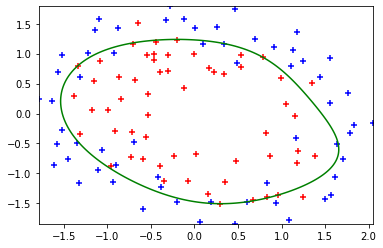

In [21]:
plt.contour(u_mapped_scaled[:,0],u_mapped_scaled[:,1],z, levels = [0.5], colors="g")
plt.scatter((x_train[positive,0]-mu[0,0])/sigma[0,0],(x_train[positive,1]-mu[0,1])/sigma[0,1],marker='+',color='r')
plt.scatter((x_train[negative,0]-mu[0,0])/sigma[0,0],(x_train[negative,1]-mu[0,1])/sigma[0,1],marker='+',color='b')

In [22]:
Accuracy=np.sum((y_predict==y_train).astype('int'))*100/len(y_train)
print(Accuracy)

83.89830508474576


In [23]:
df.insert(3,"predicted positive or negative",y_predict) #adding the prediction column

In [24]:
df["predicted positive or negative"]=df["predicted positive or negative"].replace([0,1],['negative','positive'])
df.head(11)

,feature1,feature2,positive or negative,predicted positive or negative
0,0.051267,0.699560,positive,positive
1,-0.092742,0.684940,positive,positive
2,-0.213710,0.692250,positive,positive
3,-0.375000,0.502190,positive,positive
4,-0.513250,0.465640,positive,positive
5,-0.524770,0.209800,positive,positive
6,-0.398040,0.034357,positive,positive
7,-0.305880,-0.192250,positive,positive
8,0.016705,-0.404240,positive,positive
9,0.131910,-0.513890,positive,positive


In [25]:
#Using Sickit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_mapped_scaled_sklearn=scale.fit_transform(x_mapped)

In [26]:
lr_model=LogisticRegression()
lr_model.fit(x_mapped_scaled_sklearn,y_train)

LogisticRegression()

In [27]:
print('Accuracy=',lr_model.score(x_mapped_scaled_sklearn,y_train)*100)

Accuracy= 83.05084745762711
